#### Discussion Related With Outliers And Impact On Machine Learning!!
###### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM-------- Not Sensitive To Outliers
3. Linear Regression---------- Sensitive To Outliers
4. Logistic Regression------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive
10. PCA-------------------------- Sensitive
11. Neural Networks-------------- Sensitive

In [1]:
import pandas as pd 


In [2]:
df=pd.read_csv('Titanic-Train-Data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

In [5]:
#to visualise the outliers.
import seaborn as sns

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

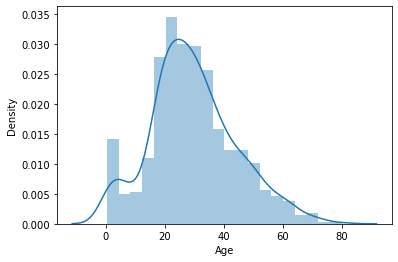

In [9]:
sns.distplot(df['Age'].dropna())

C:\Users\saika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

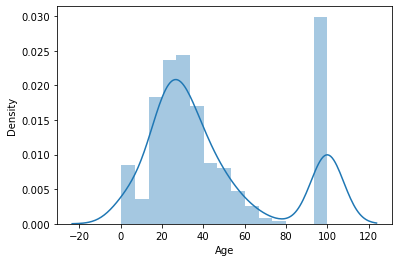

In [10]:
#when your null values with fill some random value.
sns.distplot(df['Age'].fillna(100)) #then we get outlier.

#### suppose when your data is in gussian distribution.

<AxesSubplot:xlabel='Age', ylabel='Count'>

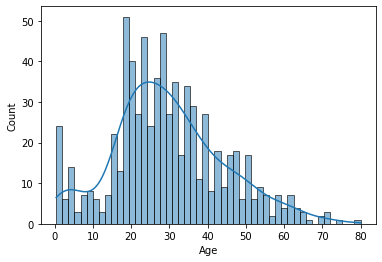

In [14]:
sns.histplot(df['Age'],bins=50,kde=True) #so,it is gussian distribution

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

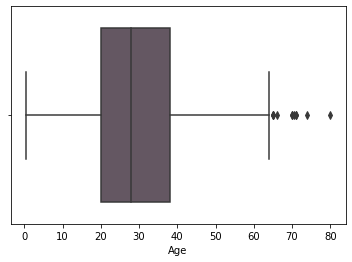

In [19]:
sns.boxplot(df['Age'],color='#665564') #here the some outliers present in it.

In [20]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If The Data Is Normally Distributed We use this


In [21]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundary=df['Age'].mean()+(3*df['Age'].std())
lower_boundary=df['Age'].mean()-(3*df['Age'].std())
print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

### If Features Are Skewed We Use the below Technique

<AxesSubplot:xlabel='Fare', ylabel='Count'>

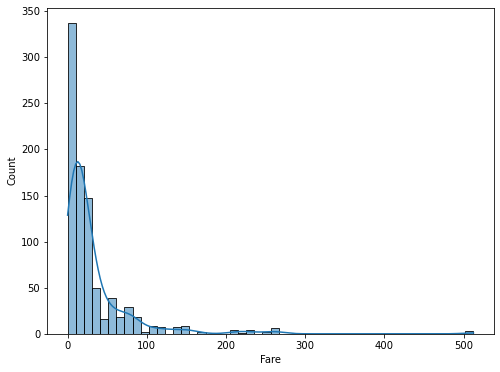

In [26]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,6)
sns.histplot(df['Fare'],bins=50,kde=True) #so it is a right skewed distribution.

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

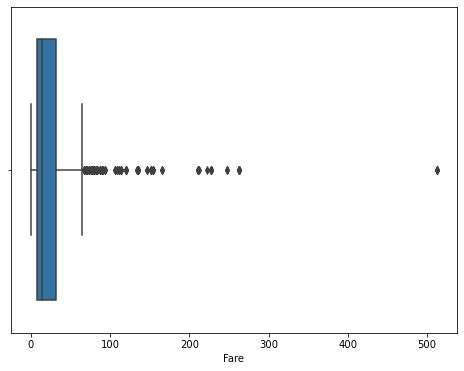

In [33]:
sns.boxplot(df['Fare'])

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
#### Lets compute the Interquantile range to calculate the boundaries
iqr=df['Fare'].quantile(75/100)-df['Fare'].quantile(25/100)

In [38]:
lf=df['Fare'].quantile(25/100)-(1.5*iqr)
uf=df['Fare'].quantile(75/100)+(1.5*iqr)
print(iqr),print(lf),print(uf)

23.0896
-26.724
65.6344


(None, None, None)

In [39]:
#extreme outliers
lf=df['Fare'].quantile(25/100)-(3*iqr)
uf=df['Fare'].quantile(75/100)+(3*iqr)
print(iqr),print(lf),print(uf)

23.0896
-61.358399999999996
100.2688


(None, None, None)

In [40]:
data=df.copy()

In [49]:
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=65,'Fare']=65

<AxesSubplot:xlabel='Age', ylabel='Count'>

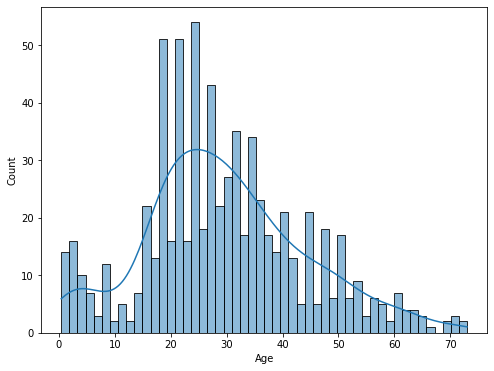

In [50]:
sns.histplot(data['Age'],kde=True,bins=50)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

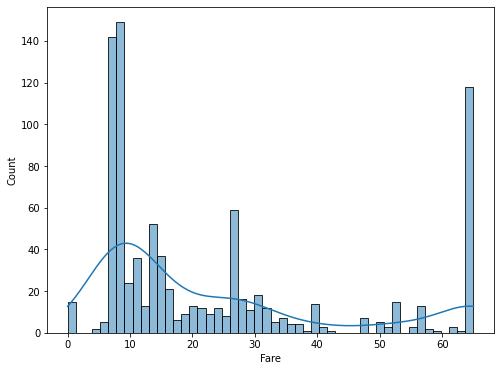

In [51]:
sns.histplot(data['Fare'],kde=True,bins=50)

C:\Users\saika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

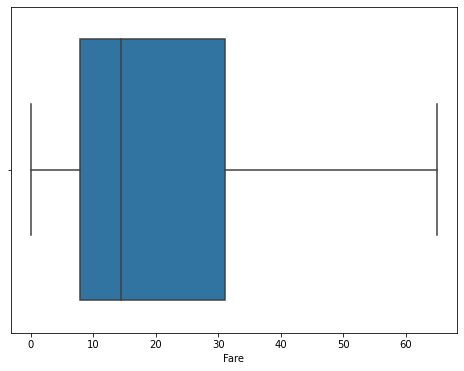

In [53]:
sns.boxplot(data['Fare']) #there is no outliers.